In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df_calls = pd.read_csv('/callsf0d4f5a.csv')
df_customer = pd.read_csv('/customers2afd6ea.csv')
df_reason = pd.read_csv('/reason18315ff.csv')
df_sentiment = pd.read_csv('/sentiment_statisticscc1e57a.csv')

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [ ]:
df_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


In [ ]:
merged_df = df_calls.merge(df_reason, on='call_id', how='left') \
                      .merge(df_customer, on='customer_id', how='left') \
                      .merge(df_sentiment, on='call_id', how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   customer_id              71810 non-null  int64  
 2   agent_id_x               71810 non-null  int64  
 3   call_start_datetime      71810 non-null  object 
 4   agent_assigned_datetime  71810 non-null  object 
 5   call_end_datetime        71810 non-null  object 
 6   call_transcript          71810 non-null  object 
 7   primary_call_reason      66653 non-null  object 
 8   customer_name            71810 non-null  object 
 9   elite_level_code         46043 non-null  float64
 10  agent_id_y               71810 non-null  int64  
 11  agent_tone               71593 non-null  object 
 12  customer_tone            71810 non-null  object 
 13  average_sentiment        71701 non-null  float64
 14  silence_percent_averag

In [ ]:
call_reason_counts = merged_df['primary_call_reason'].value_counts()
call_reason_counts

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support            136
Mileage  Plus                135
Baggage                      130
Mileage   Plus               129
Traveler   Updates           117
Unaccompanied Minor          103
Mileage Plus                 100
Post-Flight                   88
 Baggage                      86
Digital  Support              75
Products and Services         64
Communications                61
Upgrade                       56
Checkout                      48
Booking                       48
Traveler  Updates             38
Check-In                      29
Voluntary Cancel              25
Schedule Change               24
ETC                           22
Digital Support               18
Other Topics                  16
Traveler Updates              10
Disability                     9
Unaccompanied Minor            1
Name: count, dtype: int64

In [ ]:
import re

def clean_call_reason(reason):
    # Convert to lowercase
    reason = reason.lower()
    # Remove special characters and digits
    reason = re.sub(r'[^a-z\s]', '', reason)
    # Remove extra spaces
    reason = re.sub(r'\s+', ' ', reason).strip()
    return reason


In [ ]:
df_reason['cleaned_call_reason'] = df_reason['primary_call_reason'].apply(clean_call_reason)

In [ ]:
standardization_map = {
    'IRROPS': 'IRROPS',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary Cancel': 'Voluntary Cancellation',
    'Seating': 'Seating',
    'Mileage Plus': 'Mileage Plus',
    'Post-Flight': 'Post-Flight',
    'Post Flight': 'Post-Flight',
    'Communications': 'Communications',
    'Products and Services': 'Products and Services',
    'Products & Services': 'Products and Services',
    'Upgrade': 'Upgrade',
    'Baggage': 'Baggage',
    'Booking': 'Booking',
    'Checkout': 'Checkout',
    'Check-In': 'Check-In',
    'Check In': 'Check-In',
    'Digital Support': 'Digital Support',
    'ETC': 'Other',
    'Traveler Updates': 'Traveler Updates',
    'Schedule Change': 'Schedule Change',
    'Other Topics': 'Other Topics',
    'Disability': 'Disability',
    'Unaccompanied Minor': 'Unaccompanied Minor'
}

# Function to standardize the call reason
def standardize_reason(reason):
    return standardization_map.get(reason, 'Other')

# Apply the standardization
df_reason['final_call_reason'] = df_reason['primary_call_reason'].apply(standardize_reason)

In [ ]:
df_reason['final_call_reason'].value_counts()

final_call_reason
IRROPS                    13057
Voluntary Change          10291
Seating                    6223
Mileage Plus               5487
Post-Flight                4242
Other                      3860
Communications             3779
Products and Services      3268
Upgrade                    2682
Baggage                    2616
Booking                    2589
Check-In                   1875
Checkout                   1840
Voluntary Cancellation     1304
Digital Support             996
Traveler Updates            772
Schedule Change             707
Other Topics                568
Disability                  394
Unaccompanied Minor         103
Name: count, dtype: int64

In [ ]:
df_sentiment.describe()

call_id       agent_id  average_sentiment  silence_percent_average
count  7.181000e+04   71810.000000       71701.000000             71810.000000
mean   4.993574e+09  564768.278039          -0.033519                 0.285515
std    2.889673e+09  257532.362167           0.143715                 0.192031
min    1.316420e+05  102574.000000          -1.380000                 0.000000
25%    2.480013e+09  347606.000000          -0.110000                 0.130000
50%    4.989448e+09  591778.000000          -0.020000                 0.260000
75%    7.493629e+09  786323.000000           0.050000                 0.410000
max    9.999806e+09  993862.000000           2.670000                 0.980000

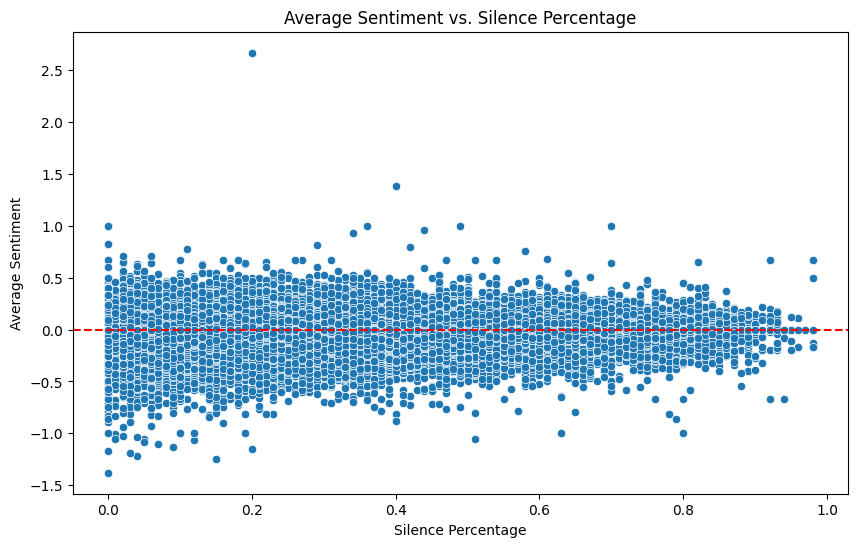

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='silence_percent_average', y='average_sentiment')
plt.title('Average Sentiment vs. Silence Percentage')
plt.xlabel('Silence Percentage')
plt.ylabel('Average Sentiment')
plt.axhline(0, color='red', linestyle='--')  # Add a line at sentiment = 0
plt.show()


In [ ]:
merged_df.describe()

call_id   customer_id     agent_id_x  elite_level_code  \
count  7.181000e+04  7.181000e+04   71810.000000      46043.000000   
mean   4.993574e+09  5.004334e+09  564768.278039          1.370871   
std    2.889673e+09  2.884255e+09  257532.362167          1.322297   
min    1.316420e+05  1.197800e+04  102574.000000          0.000000   
25%    2.480013e+09  2.514618e+09  347606.000000          0.000000   
50%    4.989448e+09  4.999664e+09  591778.000000          1.000000   
75%    7.493629e+09  7.509126e+09  786323.000000          2.000000   
max    9.999806e+09  9.999935e+09  993862.000000          5.000000   

          agent_id_y  average_sentiment  silence_percent_average  
count   71810.000000       71701.000000             71810.000000  
mean   564768.278039          -0.033519                 0.285515  
std    257532.362167           0.143715                 0.192031  
min    102574.000000          -1.380000                 0.000000  
25%    347606.000000          -0.110000                 0.130000  
50%    591778.000000          -0.020000                 0.260000  
75%    786323.000000           0.050000                 0.410000  
max    993862.000000           2.670000                 0.980000

In [ ]:
mrg_df = pd.merge(df_calls, df_reason, on='call_id', how='left')
mrg_df

call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118     7/31/2024 23:56   
1      1122072124   8186702651    519057    08-01-2024 00:03   
2      6834291559   2416856629    158319     7/31/2024 23:59   
3      2266439882   1154544516    488324    08-01-2024 00:05   
4      1211603231   5214456437    721730    08-01-2024 00:04   
...           ...          ...       ...                 ...   
71805  1563273072   8022667294    413148     8/31/2024 23:48   
71806  8865997781   4474867021    980156     8/31/2024 23:55   
71807  8019240181   9762042472    616988     8/31/2024 23:52   
71808  8332067080   8095620266    161354     8/31/2024 23:53   
71809  8210720833   8014388758    547592     8/31/2024 23:49   

      agent_assigned_datetime call_end_datetime  \
0            08-01-2024 00:03  08-01-2024 00:34   
1            08-01-2024 00:06  08-01-2024 00:18   
2            08-01-2024 00:07  08-01-2024 00:26   
3            08-01-2024 00:10  08-01-2024 00:17   
4            08-01-2024 00:14  08-01-2024 00:23   
...                       ...               ...   
71805         8/31/2024 23:57  09-01-2024 00:25   
71806         8/31/2024 23:58  09-01-2024 00:06   
71807         8/31/2024 23:58  09-01-2024 00:04   
71808         8/31/2024 23:59  09-01-2024 00:03   
71809         8/31/2024 23:59  09-01-2024 00:02   

                                         call_transcript primary_call_reason  \
0      \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   
1      \n\nAgent: Thank you for calling United Airlin...             Booking   
2      \n\nAgent: Thank you for calling United Airlin...              IRROPS   
3      \n\nAgent: Thank you for calling United Airlin...             Upgrade   
4      \n\nAgent: Thank you for calling United Airlin...             Seating   
...                                                  ...                 ...   
71805  \n\nAgent: Thank you for calling United Airlin...         Post Flight   
71806  \n\nAgent: Thank you for calling United Airlin...             Upgrade   
71807  \n\nAgent: Thank you for calling United Airlin...             Upgrade   
71808  \n\nAgent: Thank you for calling United Airlin...                 NaN   
71809  \n\nAgent: Thank you for calling United Airlin...    Digital  Support   

      cleaned_call_reason final_call_reason  
0        voluntary cancel             Other  
1                 booking           Booking  
2                  irrops            IRROPS  
3                 upgrade           Upgrade  
4                 seating           Seating  
...                   ...               ...  
71805         post flight       Post-Flight  
71806             upgrade           Upgrade  
71807             upgrade           Upgrade  
71808                 NaN               NaN  
71809     digital support             Other  

[71810 rows x 10 columns]

In [ ]:
mrg_df.isnull().sum()

call_id                       0
customer_id                   0
agent_id                      0
call_start_datetime           0
agent_assigned_datetime       0
call_end_datetime             0
call_transcript               0
primary_call_reason        5157
cleaned_call_reason        5157
final_call_reason          5157
dtype: int64

In [ ]:
mrg_df.duplicated().sum()

0

In [ ]:


import re

def clean_call_reason(reason):

    if not isinstance(reason, str):
        try:
            reason = str(reason)
        except (TypeError, ValueError):
            return reason
    # Convert to lowercas
    reason = reason.lower()
    # Remove special characters and digits
    reason = re.sub(r'[^a-z\s]', '', reason)
    # Remove extra spaces
    reason = re.sub(r'\s+', ' ', reason).strip()
    return reason


In [ ]:
mrg_df['cleaned_call_reason'] = mrg_df['primary_call_reason'].apply(clean_call_reason)

In [ ]:
standardization_map = {
    'IRROPS': 'IRROPS',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary Cancel': 'Voluntary Cancellation',
    'Seating': 'Seating',
    'Mileage Plus': 'Mileage Plus',
    'Post-Flight': 'Post-Flight',
    'Post Flight': 'Post-Flight',
    'Communications': 'Communications',
    'Products and Services': 'Products and Services',
    'Products & Services': 'Products and Services',
    'Upgrade': 'Upgrade',
    'Baggage': 'Baggage',
    'Booking': 'Booking',
    'Checkout': 'Checkout',
    'Check-In': 'Check-In',
    'Check In': 'Check-In',
    'Digital Support': 'Digital Support',
    'Other':'Other',
    'Other Topics': 'Other ',
    'ETC': 'ETC',
    'Traveler Updates': 'Traveler Updates',
    'Schedule Change': 'Schedule Change',
    'Disability': 'Disability',
    'Unaccompanied Minor': 'Unaccompanied Minor'
}

# Function to standardize the call reason
def standardize_reason(reason):
    return standardization_map.get(reason, 'Notdefined')

# Apply the standardization
mrg_df['final_call_reason'] = mrg_df['primary_call_reason'].apply(standardize_reason)



In [ ]:
mrg_df['final_call_reason'].value_counts()

final_call_reason
IRROPS                    13057
Voluntary Change          10291
Notdefined                 8087
Seating                    6223
Mileage Plus               5487
Post-Flight                4242
Communications             3779
Products and Services      3268
Upgrade                    2682
Baggage                    2616
Booking                    2589
Check-In                   1875
Checkout                   1840
Voluntary Cancellation     1304
Digital Support             996
ETC                         930
Traveler Updates            772
Schedule Change             707
Other                       568
Disability                  394
Unaccompanied Minor         103
Name: count, dtype: int64

In [ ]:
!pip install wordcloud

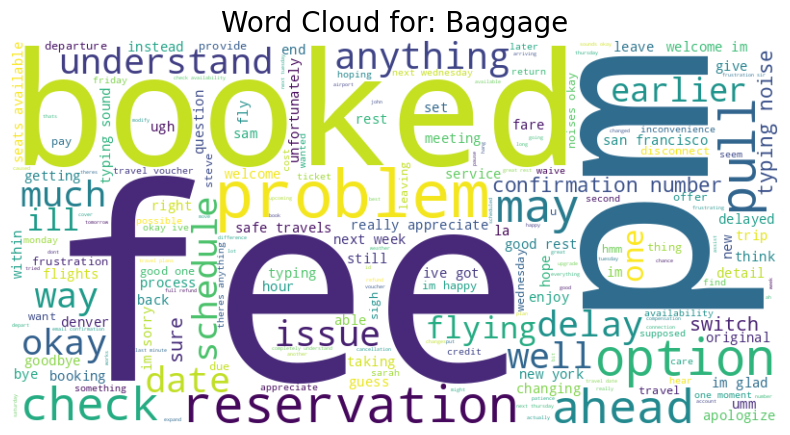

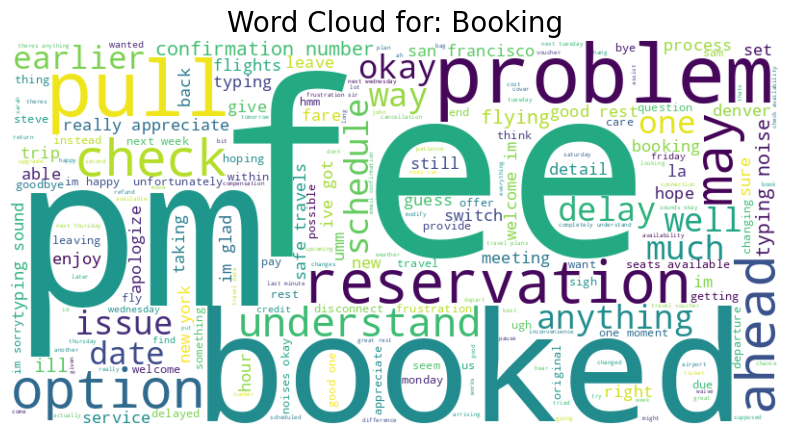

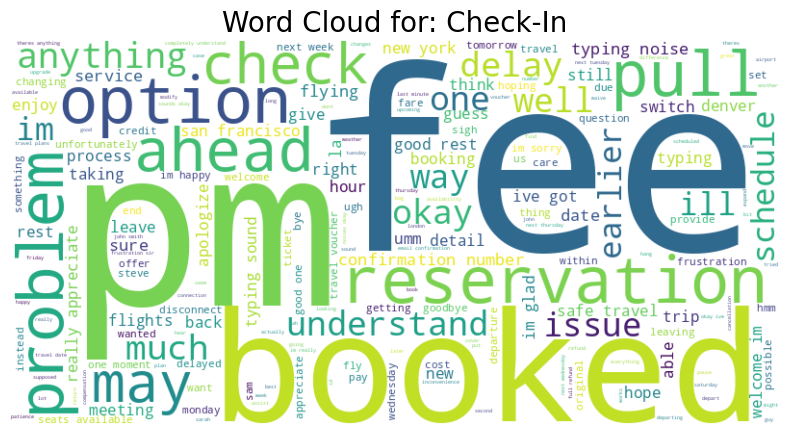

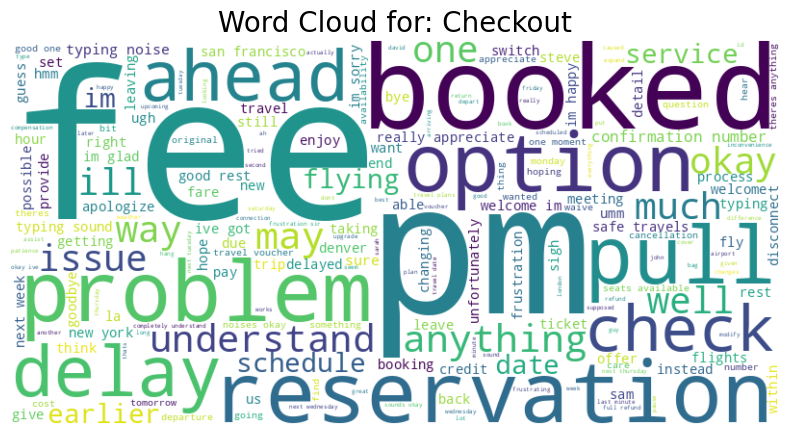

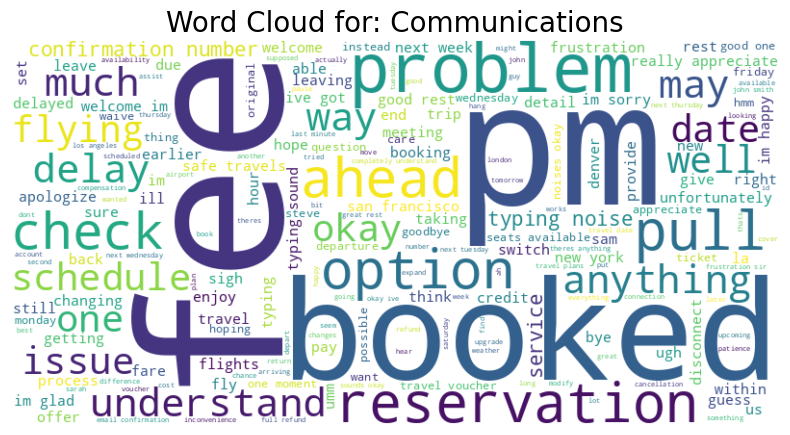

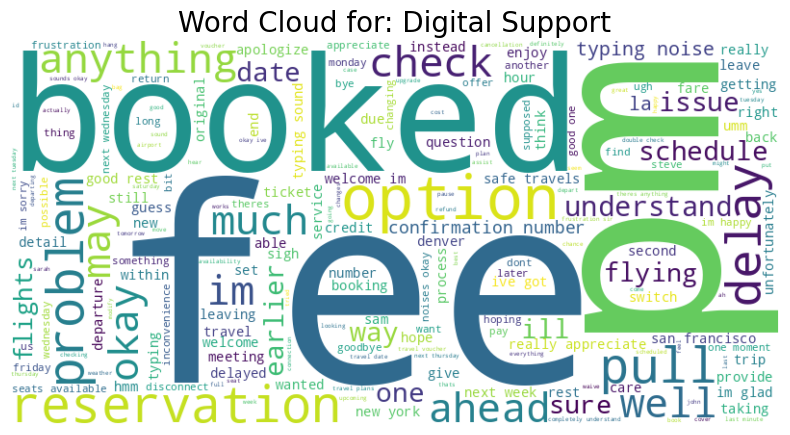

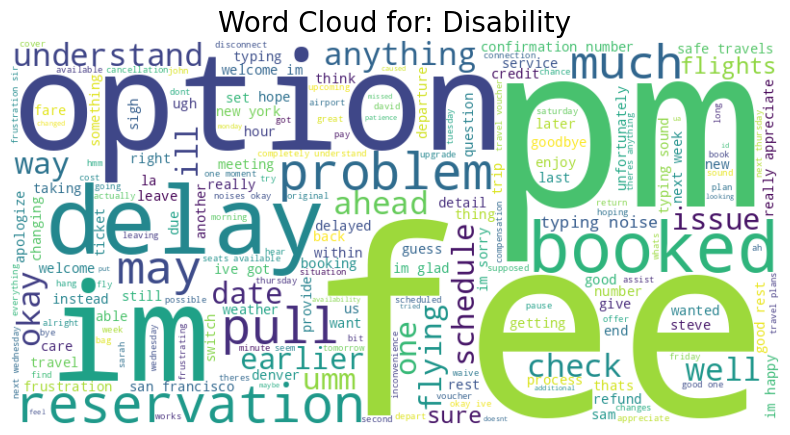

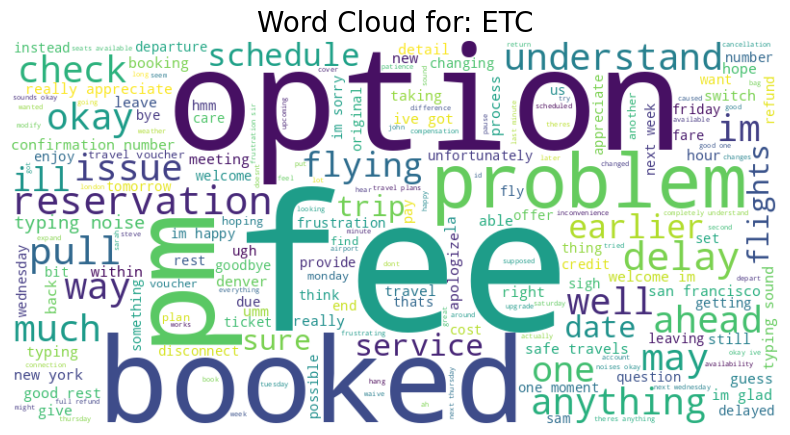

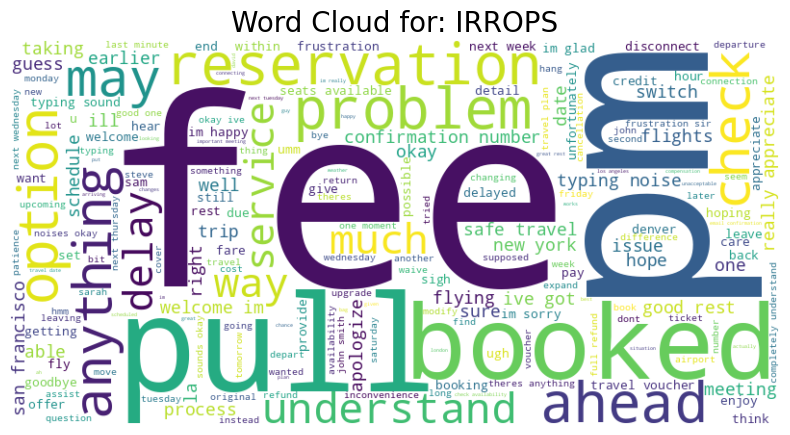

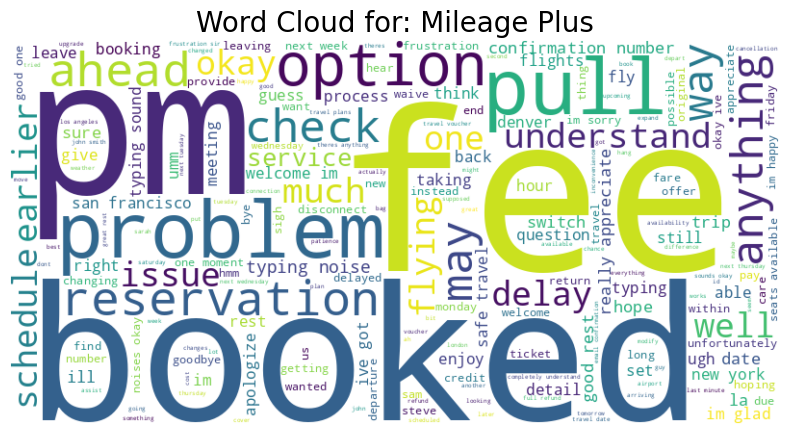

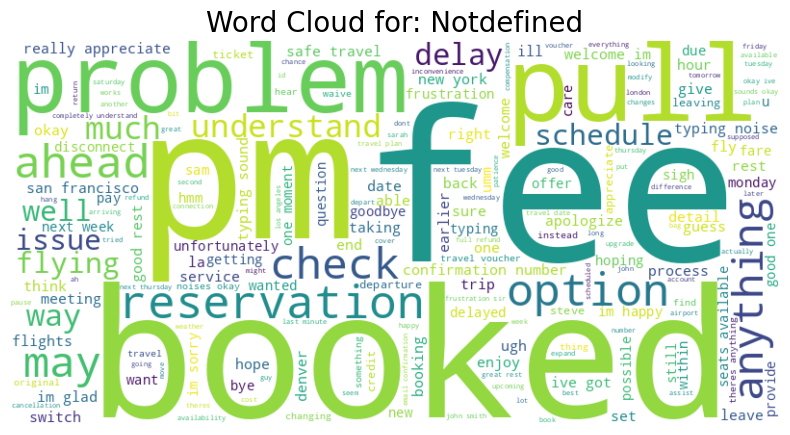

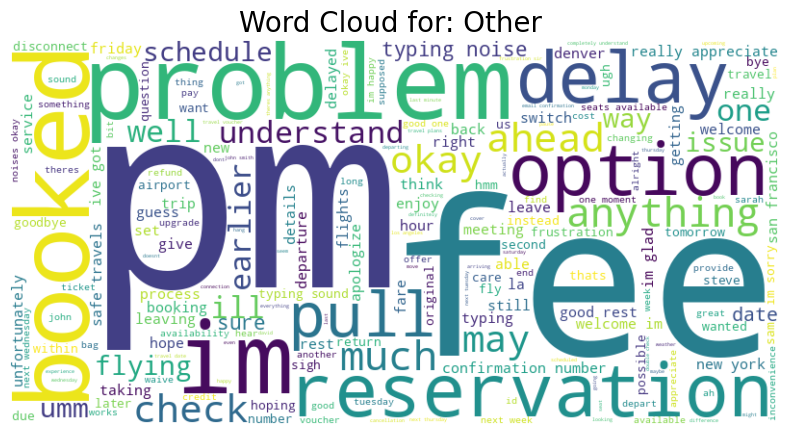

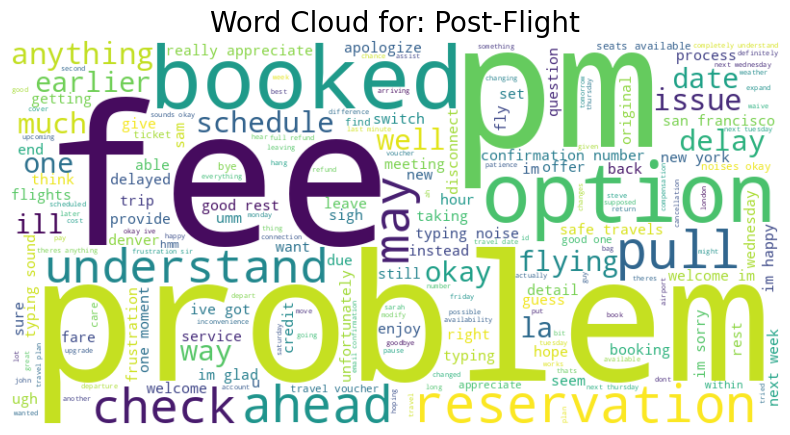

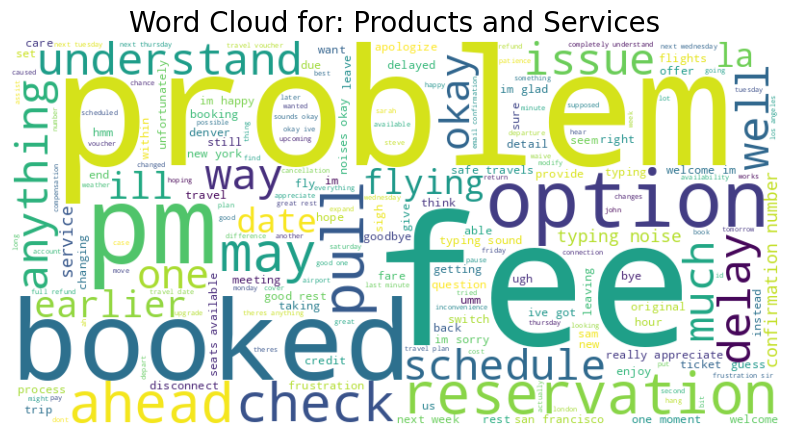

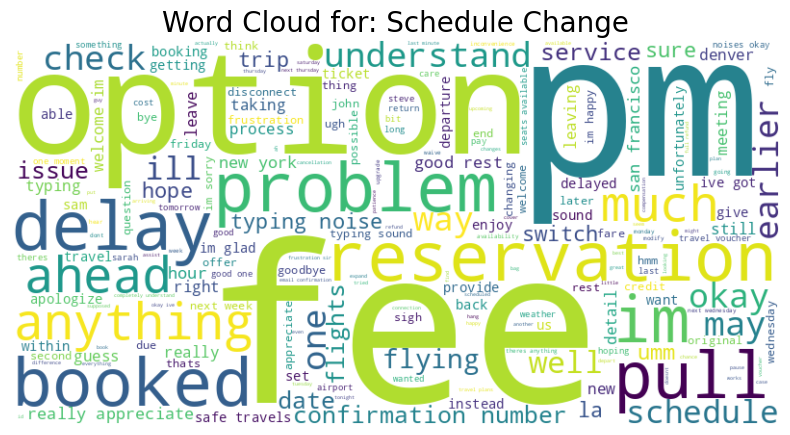

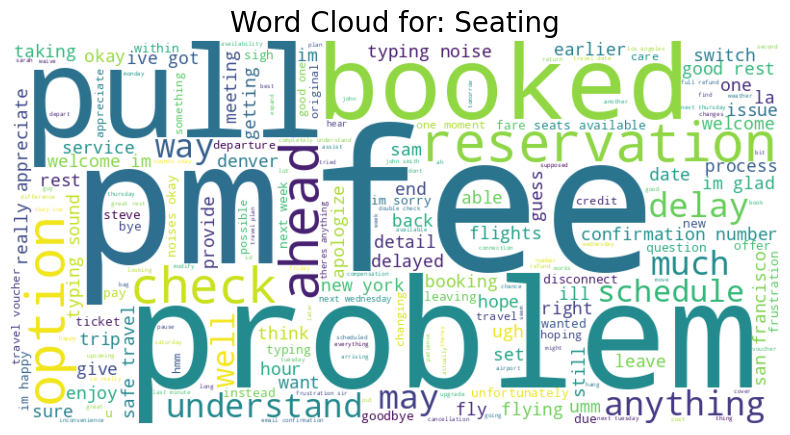

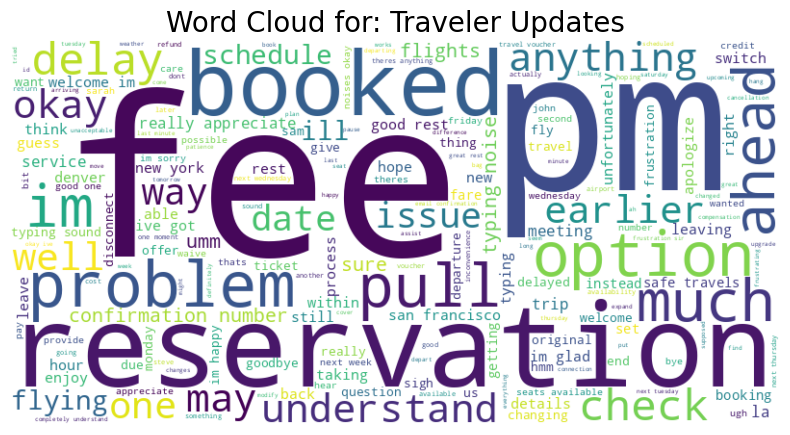

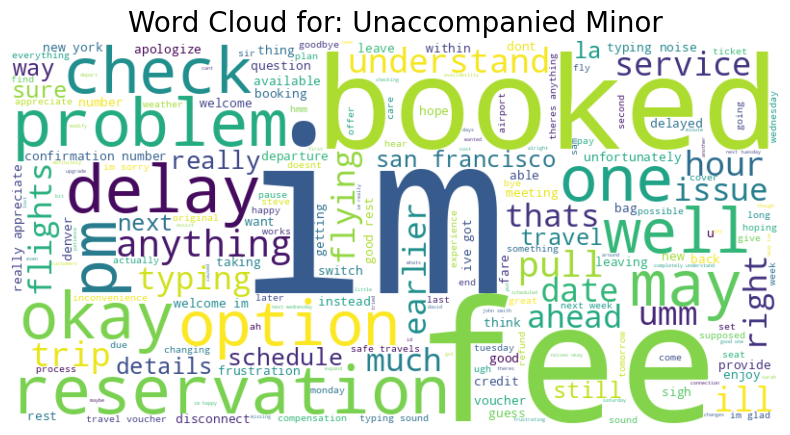

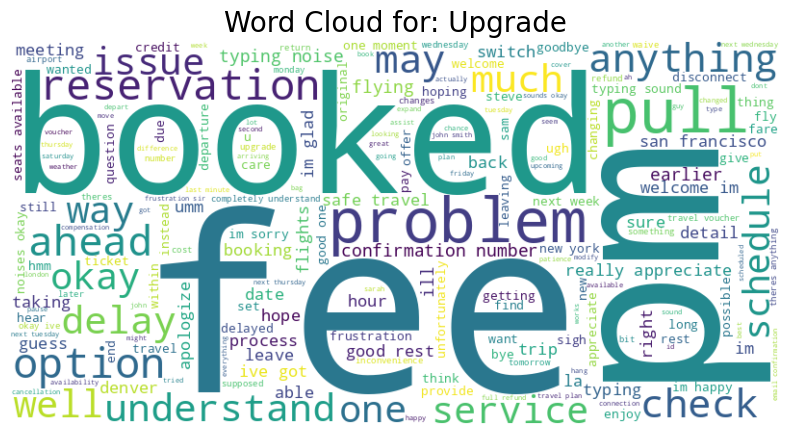

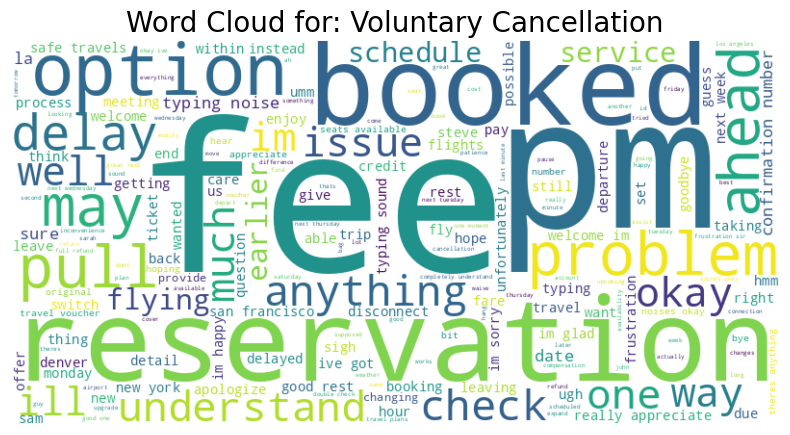

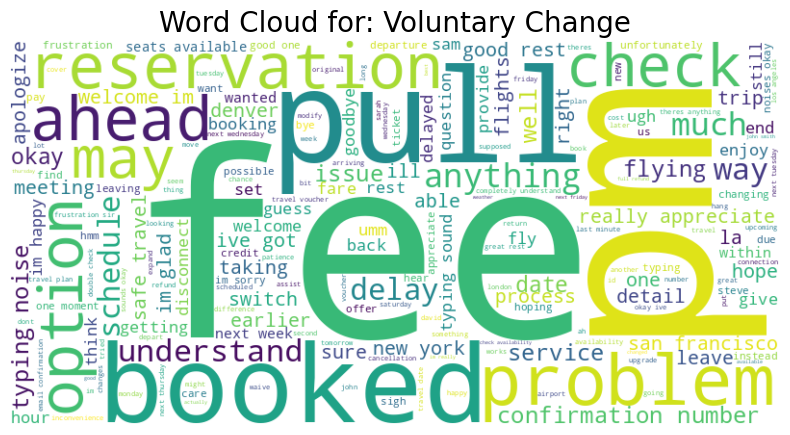

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import string

# Function to generate and display word cloud for a specific text
def generate_wordcloud(text, title, stopwords=None):
    if stopwords is None:
        stopwords = set(STOPWORDS)

    # Check if the text is empty before generating the word cloud
    if len(text.strip()) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=20)
        plt.show()
    else:
        print(f"No words available for the word cloud for: {title}")

# Preprocessing function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase, remove punctuation and digits
    text = text.lower().translate(str.maketrans('', '', string.punctuation + string.digits))
    return text

# Add domain-specific stopwords (e.g., flight-related terms, general help phrases)
custom_stopwords = set(STOPWORDS).union({"chicago","see","yeah","now","will","go","name","better","today","airlines","please","make","day","thanks","customer","united","airline","time","calling","youre","hi","see","flight", "help", "take", "look", "agent", "call","need","thank","unites","know","let","looks","change","work",})


# Get the list of unique primary call reasons
primary_call_reasons = mrg_df['final_call_reason'].unique()

grouped_transcripts = mrg_df.groupby('final_call_reason')['call_transcript'].apply(lambda x: ' '.join(x))

# Loop through each primary call reason and generate a word cloud
for reason, transcripts in grouped_transcripts.items():
    # Preprocess the combined transcripts for each reason
    transcripts_text = preprocess_text(transcripts)

    # Generate word cloud for this reason with custom stopwords
    generate_wordcloud(transcripts_text, title=f"Word Cloud for: {reason}", stopwords=custom_stopwords)




In [ ]:

mrg_df = mrg_df.merge(df_sentiment,on='call_id',how='left')\
                  .merge(df_customer, on='customer_id', how='left')

In [ ]:
mrg_df.columns


In [ ]:
mrg_df.isnull().sum()

In [ ]:
mrg_df.duplicated().sum()

In [ ]:


# Check for equality between agent_id_x and agent_id_y
mrg_df['agents_equal'] = mrg_df['agent_id_x'] == mrg_df['agent_id_y']

# Display the count of rows where they are equal and not equal
equal_count = mrg_df['agents_equal'].sum()
not_equal_count = (~mrg_df['agents_equal']).sum()

print(f"Count of rows where agent_id_x and agent_id_y are equal: {equal_count}")
print(f"Count of rows where agent_id_x and agent_id_y are not equal: {not_equal_count}")

# Optionally, display rows where they are not equal
mismatched_agents = mrg_df[~mrg_df['agents_equal']]
print("\nRows where agent_id_x and agent_id_y are not equal:\n", mismatched_agents[['agent_id_x', 'agent_id_y']])


Count of rows where agent_id_x and agent_id_y are equal: 71810
Count of rows where agent_id_x and agent_id_y are not equal: 0

Rows where agent_id_x and agent_id_y are not equal:
 Empty DataFrame
Columns: [agent_id_x, agent_id_y]
Index: []


In [ ]:
mrg_df=mrg_df.drop(columns=['agents_equal','agent_id_y'])

In [ ]:
mrg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   customer_id              71810 non-null  int64  
 2   agent_id_x               71810 non-null  int64  
 3   call_start_datetime      71810 non-null  object 
 4   agent_assigned_datetime  71810 non-null  object 
 5   call_end_datetime        71810 non-null  object 
 6   call_transcript          71810 non-null  object 
 7   primary_call_reason      66653 non-null  object 
 8   cleaned_call_reason      71810 non-null  object 
 9   final_call_reason        71810 non-null  object 
 10  agent_tone               71593 non-null  object 
 11  customer_tone            71810 non-null  object 
 12  average_sentiment        71701 non-null  float64
 13  silence_percent_average  71810 non-null  float64
 14  customer_name         

In [ ]:
mrg_df.columns

In [ ]:
mrg_types=mrg_df.dtypes
print(mrg_types)

In [ ]:
mrg_df.isnull().sum()

In [ ]:

from dateutil import parser


def parse_date(date_str):
    if isinstance(date_str, str):
        try:
            return parser.parse(date_str)
        except ValueError:
            return None
    else:
        return date_str

# Apply the function to the columns
mrg_df['call_start_datetime'] = mrg_df['call_start_datetime'].apply(parse_date)
mrg_df['call_end_datetime'] = mrg_df['call_end_datetime'].apply(parse_date)
mrg_df['agent_assigned_datetime'] = mrg_df['agent_assigned_datetime'].apply(parse_date)
# Convert the columns to a single datetime format

mrg_df['call_start_datetime'] = pd.to_datetime(mrg_df['call_start_datetime'])
mrg_df['agent_assigned_datetime'] = pd.to_datetime(mrg_df['agent_assigned_datetime'])
mrg_df['call_end_datetime'] = pd.to_datetime(mrg_df['call_end_datetime'])

# Print the first few rows of the dataframe to verify the conversion
mrg_df.head()

call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118 2024-07-31 23:56:00   
1  1122072124   8186702651      519057 2024-08-01 00:03:00   
2  6834291559   2416856629      158319 2024-07-31 23:59:00   
3  2266439882   1154544516      488324 2024-08-01 00:05:00   
4  1211603231   5214456437      721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   
1  \n\nAgent: Thank you for calling United Airlin...             Booking   
2  \n\nAgent: Thank you for calling United Airlin...              IRROPS   
3  \n\nAgent: Thank you for calling United Airlin...             Upgrade   
4  \n\nAgent: Thank you for calling United Airlin...             Seating   

  cleaned_call_reason final_call_reason agent_tone customer_tone  \
0    voluntary cancel        Notdefined    neutral         angry   
1             booking           Booking       calm       neutral   
2              irrops            IRROPS    neutral        polite   
3             upgrade           Upgrade    neutral    frustrated   
4             seating           Seating    neutral        polite   

   average_sentiment  silence_percent_average      customer_name  \
0              -0.04                     0.39     Matthew Foster   
1               0.02                     0.35      Tammy Walters   
2              -0.13                     0.32      Jeffery Dixon   
3              -0.20                     0.20      David Wilkins   
4              -0.05                     0.35  Elizabeth Daniels   

   elite_level_code  
0               4.0  
1               NaN  
2               NaN  
3               2.0  
4               0.0

In [ ]:

mrg_df.isnull().sum()

call_id                        0
customer_id                    0
agent_id_x                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
primary_call_reason         5157
cleaned_call_reason            0
final_call_reason              0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
customer_name                  0
elite_level_code           25767
dtype: int64

In [ ]:
mrg_df['call_duration'] = (mrg_df['call_end_datetime'] - mrg_df['call_start_datetime']).dt.total_seconds()

# Step 3: Calculate Waiting Time for AST
mrg_df['waiting_time'] = (mrg_df['agent_assigned_datetime'] - mrg_df['call_start_datetime']).dt.total_seconds()

# Step 4: Calculate AHT and AST
total_calls = len(mrg_df)

average_aht = mrg_df['call_duration'].mean()  # Average Handle Time in seconds
average_aht_minutes = average_aht / 60  # Convert to minutes

average_ast = mrg_df['waiting_time'].mean()  # Average Speed to Answer in seconds
average_ast_minutes = average_ast / 60  # Convert to minutes

# Display the calculated AHT and AST
print(f"Average Handle Time (AHT): {average_aht_minutes:.2f} minutes")
print(f"Average Speed to Answer (AST): {average_ast_minutes:.2f} minutes")

Average Handle Time (AHT): 18.90 minutes
Average Speed to Answer (AST): 7.28 minutes


In [ ]:
mrg_df.isnull().sum()

In [ ]:
mrg_df.dtypes


In [ ]:
mrg_df=mrg_df.drop(columns=['primary_call_reason','cleaned_call_reason'])

In [ ]:
mrg_df.columns

In [ ]:
mrg_df['final_call_reason'].value_counts()

In [ ]:
mrg_df = mrg_df.dropna(subset=['agent_tone'])


In [ ]:
mrg_df.groupby(['agent_tone', 'customer_tone'])[['call_duration','waiting_time','silence_percent_average']].mean()

call_duration  waiting_time  silence_percent_average
agent_tone customer_tone                                                      
angry      angry             941.298701    443.376623                 0.235195
           calm              784.411765    431.470588                 0.179265
           frustrated        824.651163    434.651163                 0.186512
           neutral           756.750000    409.500000                 0.172000
           polite            788.461538    406.923077                 0.177436
calm       angry            1060.093458    443.661113                 0.295169
           calm             1076.518235    441.603869                 0.291233
           frustrated       1072.306748    442.809816                 0.288885
           neutral          1073.401565    445.538832                 0.292575
           polite           1067.736425    444.014643                 0.289150
frustrated angry            1054.426230    423.770492                 0.256913
           calm             1030.275762    422.264151                 0.253890
           frustrated       1004.131579    425.684211                 0.236803
           neutral          1087.035040    432.857143                 0.257493
           polite           1031.984231    417.398160                 0.252168
neutral    angry            1183.966117    433.325598                 0.284452
           calm             1186.753065    436.749562                 0.285226
           frustrated       1179.578549    434.206227                 0.286138
           neutral          1198.644147    433.998835                 0.290766
           polite           1174.533536    433.941238                 0.284795
polite     angry             796.666667    456.666667                 0.333889
           calm              670.588235    532.941176                 0.200588
           frustrated        652.500000    450.000000                 0.178125
           neutral           670.588235    437.647059                 0.281176
           polite            615.789474    432.631579                 0.277368

from matplotlib import pyplot as plt
_df_0['call_duration'].plot(kind='hist', bins=20, title='call_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['waiting_time'].plot(kind='hist', bins=20, title='waiting_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['silence_percent_average'].plot(kind='hist', bins=20, title='silence_percent_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='call_duration', y='waiting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='waiting_time', y='silence_percent_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['call_duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('waiting_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('call_duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['silence_percent_average']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('waiting_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('silence_percent_average')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['waiting_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'waiting_time'}, axis=1)
              .sort_values('waiting_time', ascending=True))
  xs = counted['waiting_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('waiting_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['call_duration'].plot(kind='line', figsize=(8, 4), title='call_duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['waiting_time'].plot(kind='line', figsize=(8, 4), title='waiting_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['silence_percent_average'].plot(kind='line', figsize=(8, 4), title='silence_percent_average')
plt.gca().spines[['top', 'right']].set_visible(False)

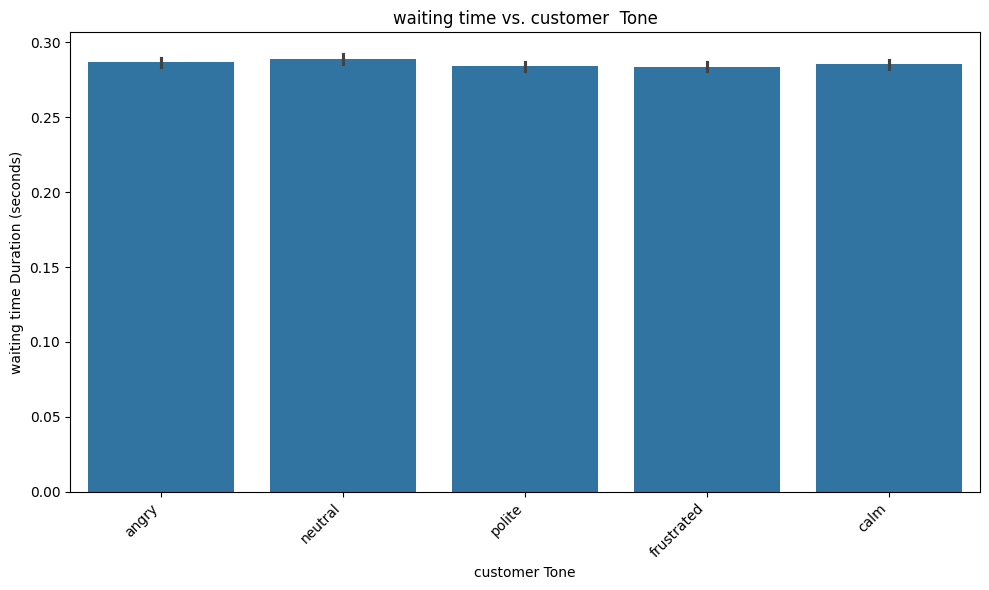

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_tone', y='silence_percent_average', data=mrg_df)
plt.title('waiting time vs. customer  Tone')
plt.xlabel('customer Tone')
plt.ylabel('waiting time Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = mrg_df[['average_sentiment', 'silence_percent_average', 'elite_level_code']].corr()
print(correlation_matrix)


In [ ]:
mrg_df.describe()

In [ ]:

correlation_matrix = mrg_df[['call_duration', 'waiting_time', 'average_sentiment', 'silence_percent_average']].corr()
print(correlation_matrix)

# Optional: Heatmap for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for Call Duration
plt.figure(figsize=(12, 6))
sns.histplot(mrg_df['call_duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plot for Average Sentiment by Call Reason
plt.figure(figsize=(12, 6))
sns.boxplot(data=mrg_df, x='final_call_reason', y='average_sentiment')
plt.title('Average Sentiment by Call Reason')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=mrg_df, x='call_duration', y='average_sentiment', hue='final_call_reason', alpha=0.7)
plt.title('Call Duration vs. Average Sentiment')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Average Sentiment')
plt.legend(title='Call Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Grouping by call reason to calculate average waiting time
avg_waiting_time = mrg_df.groupby('final_call_reason')['waiting_time'].mean().reset_index()

# Bar plot for average waiting time by call reason
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_waiting_time, x='waiting_time', y='final_call_reason', palette='viridis')
plt.title('Average Waiting Time by Call Reason')
plt.xlabel('Average Waiting Time (seconds)')
plt.ylabel('Call Reason')
plt.grid(True)
plt.show()


In [ ]:
# Average sentiment by agent
avg_sentiment_by_agent = mrg_df.groupby('agent_id_x')['average_sentiment'].mean().reset_index()

# Bar plot for average sentiment by agent
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sentiment_by_agent, x='average_sentiment', y='agent_id_x', palette='mako')
plt.title('Average Sentiment by Agent')
plt.xlabel('Average Sentiment')
plt.ylabel('Agent ID')
plt.grid(True)
plt.show()


In [ ]:
# Box plot for call duration by agent tone
plt.figure(figsize=(12, 6))
sns.boxplot(data=mrg_df, x='agent_tone', y='call_duration', palette='pastel')
plt.title('Call Duration by Agent Tone')
plt.xlabel('customer Tone')
plt.ylabel('Call Duration (seconds)')
plt.grid(True)
plt.show()


In [ ]:
# Grouping by final_call_reason to calculate AHT
aht_by_reason = mrg_df.groupby('final_call_reason').agg(
    total_handle_time=('call_duration', 'sum'),
    total_calls=('call_duration', 'count')
).reset_index()

# Calculate AHT in minutes
aht_by_reason['AHT_minutes'] = (aht_by_reason['total_handle_time'] / aht_by_reason['total_calls']) / 60

# Selecting relevant columns for clarity
aht_by_reason = aht_by_reason[['final_call_reason', 'AHT_minutes', 'total_calls', 'total_handle_time']]

# Display the AHT by call reason
print(aht_by_reason)


         final_call_reason  AHT_minutes  total_calls  total_handle_time
0                  Baggage    14.646741         2593          2278740.0
1                  Booking    11.118355         2577          1719120.0
2                 Check-In    15.484492         1870          1737360.0
3                 Checkout    28.937841         1834          3184320.0
4           Communications    17.789669         3775          4029360.0
5          Digital Support    14.767911          991           878100.0
6               Disability    13.244275          393           312300.0
7                      ETC    24.904095          928          1386660.0
8                   IRROPS    19.120437        13011         14926560.0
9             Mileage Plus    22.638838         5474          7435500.0
10              Notdefined    18.678656         8063          9036360.0
11                  Other     10.051237          566           341340.0
12             Post-Flight    25.081260         4221          63

In [ ]:
calls_by_agent_reason = mrg_df.groupby(['agent_id_x', 'final_call_reason']).size().reset_index(name='call_count')

# Display the results
print(calls_by_agent_reason)


      agent_id_x       final_call_reason  call_count
0         102574                  IRROPS           1
1         102574             Post-Flight           1
2         103651                 Baggage           6
3         103651                 Booking           7
4         103651                Check-In           8
...          ...                     ...         ...
6238      993862                 Seating          34
6239      993862        Traveler Updates           5
6240      993862                 Upgrade           9
6241      993862  Voluntary Cancellation           3
6242      993862        Voluntary Change          56

[6243 rows x 3 columns]


In [ ]:
# Ensure call_start_datetime is in datetime format
mrg_df['call_start_datetime'] = pd.to_datetime(mrg_df['call_start_datetime'])

# Extract date from call_start_datetime
mrg_df['call_date'] = mrg_df['call_start_datetime'].dt.date

# Group by agent_id and call_date to count calls attended
calls_per_agent_daily = mrg_df.groupby(['agent_id_x', 'call_date']).size().reset_index(name='call_count')

# Display the result
print(calls_per_agent_daily)


      agent_id_x   call_date  call_count
0         102574  2024-08-31           2
1         103651  2024-08-03          18
2         103651  2024-08-04          21
3         103651  2024-08-10          19
4         103651  2024-08-11          23
...          ...         ...         ...
5434      993862  2024-08-27          22
5435      993862  2024-08-28          17
5436      993862  2024-08-29          17
5437      993862  2024-08-30          14
5438      993862  2024-08-31           8

[5439 rows x 3 columns]


final_call_reason
IRROPS                    13011
Voluntary Change          10270
Notdefined                 8063
Seating                    6213
Mileage Plus               5474
Post-Flight                4221
Communications             3775
Products and Services      3259
Upgrade                    2679
Baggage                    2593
Booking                    2577
Check-In                   1870
Checkout                   1834
Voluntary Cancellation     1300
Digital Support             991
ETC                         928
Traveler Updates            767
Schedule Change             706
Other                       566
Disability                  393
Unaccompanied Minor         103
Name: count, dtype: int64


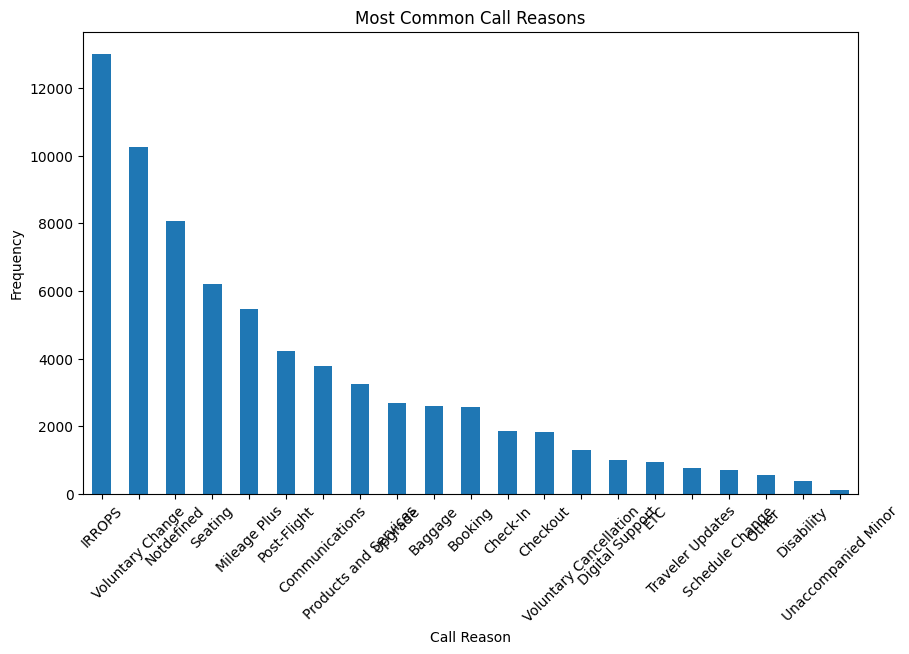

In [ ]:

# Count occurrences of each primary call reason
call_reason_counts = mrg_df['final_call_reason'].value_counts()

# Display the most common call reasons
print(call_reason_counts)

# Plot the top call reasons
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
call_reason_counts.plot(kind='bar')
plt.title('Most Common Call Reasons')
plt.xlabel('Call Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate average wait time and sentiment for elite customers vs. regular customers
elite_customers = mrg_df[mrg_df['elite_level_code'] > 0]  # Assuming elite_level_code > 0 indicates elite customers
regular_customers = mrg_df[mrg_df['elite_level_code'].isnull()]  # Assuming null indicates regular customers

# Calculate averages
elite_avg_waiting_time = elite_customers['waiting_time'].mean()
elite_avg_sentiment = elite_customers['average_sentiment'].mean()

regular_avg_waiting_time = regular_customers['waiting_time'].mean()
regular_avg_sentiment = regular_customers['average_sentiment'].mean()

# Print results
print(f'Elite Customers - Average Waiting Time: {elite_avg_waiting_time} seconds, Average Sentiment: {elite_avg_sentiment}')
print(f'Regular Customers - Average Waiting Time: {regular_avg_waiting_time} seconds, Average Sentiment: {regular_avg_sentiment}')


Elite Customers - Average Waiting Time: 431.8236802938662 seconds, Average Sentiment: -0.03301149498084171
Regular Customers - Average Waiting Time: 442.6261682242991 seconds, Average Sentiment: -0.03228076323987539


In [ ]:
mrg_df['final_call_reason'].unique()

array(['Notdefined', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Checkout', 'Post-Flight', 'Check-In', 'Communications',
       'Schedule Change', 'Products and Services', 'Disability',
       'Unaccompanied Minor', 'ETC', 'Voluntary Change', 'Mileage Plus',
       'Baggage', 'Traveler Updates', 'Voluntary Cancellation', 'Other ',
       'Digital Support'], dtype=object)

test=mrf_df.groupby

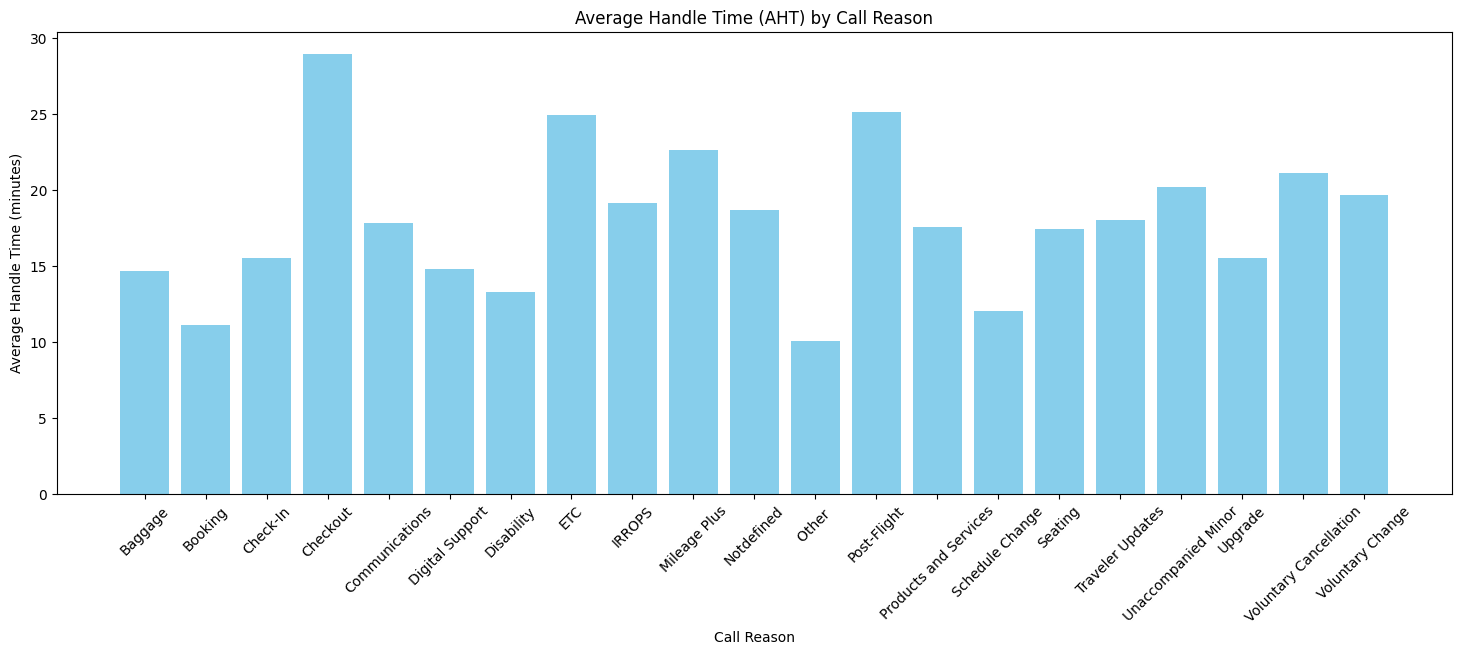

In [ ]:
# Calculate Average Handle Time (AHT) by final_call_reason
aht_by_reason = mrg_df.groupby('final_call_reason')['call_duration'].mean().reset_index()

# Convert AHT to minutes
aht_by_reason['AHT (minutes)'] = aht_by_reason['call_duration'] / 60

# Plot AHT by Call Reason
plt.figure(figsize=(18, 6))
plt.bar(aht_by_reason['final_call_reason'], aht_by_reason['AHT (minutes)'], color='skyblue')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.show()


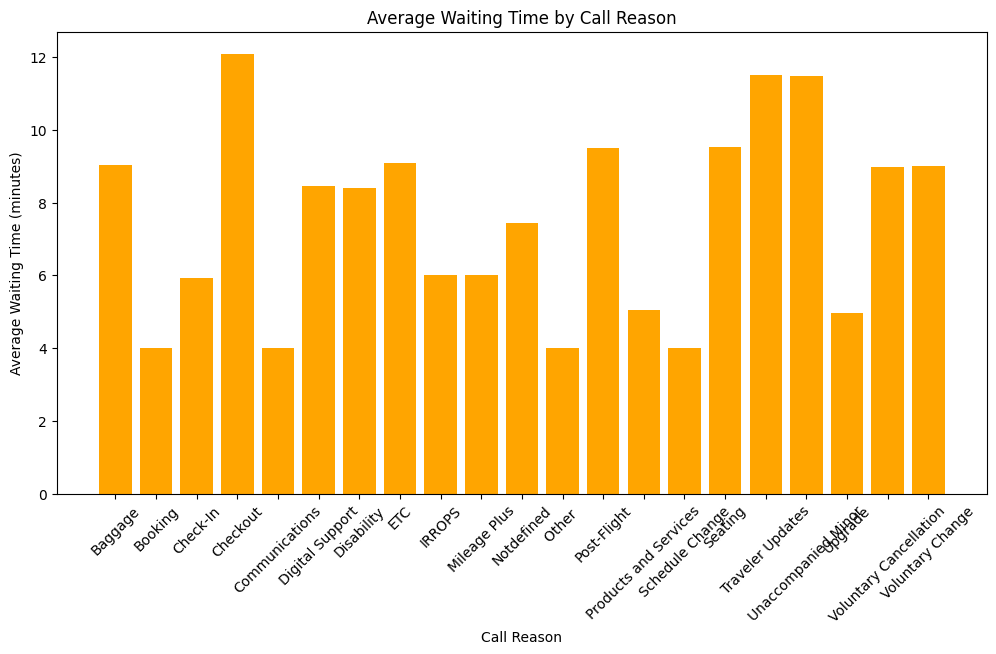

In [ ]:
# Calculate Average Waiting Time by final_call_reason
waiting_time_by_reason = mrg_df.groupby('final_call_reason')['waiting_time'].mean().reset_index()

# Convert Waiting Time to minutes
waiting_time_by_reason['Waiting Time (minutes)'] = waiting_time_by_reason['waiting_time'] / 60

# Plot Average Waiting Time by Call Reason
plt.figure(figsize=(12, 6))
plt.bar(waiting_time_by_reason['final_call_reason'], waiting_time_by_reason['Waiting Time (minutes)'], color='orange')
plt.title('Average Waiting Time by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Waiting Time (minutes)')
plt.xticks(rotation=45)
plt.show()


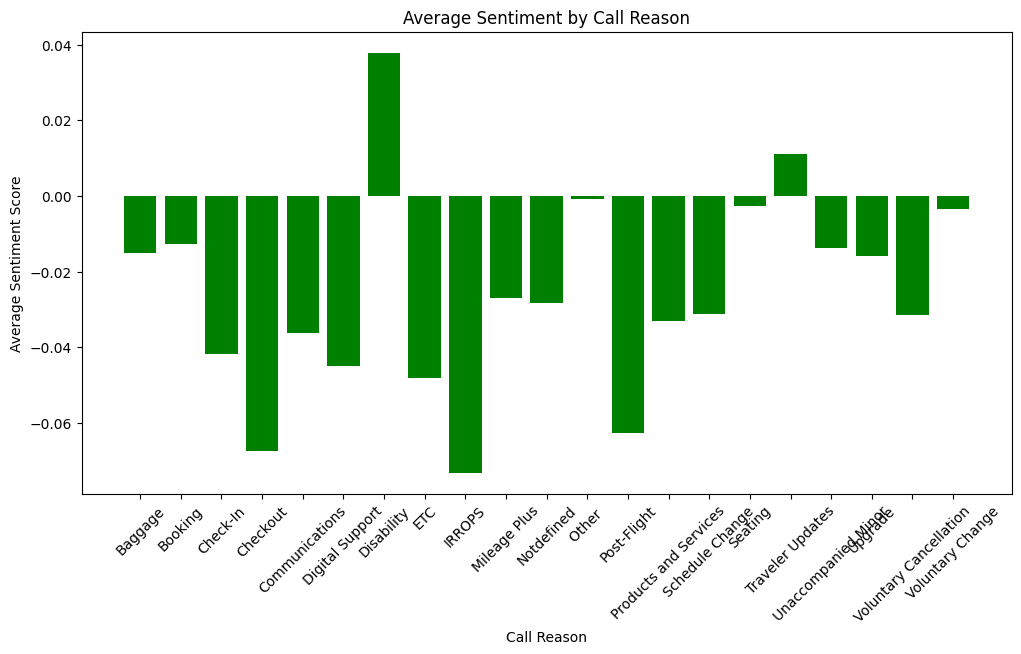

In [ ]:
# Calculate Average Sentiment by final_call_reason
sentiment_by_reason = mrg_df.groupby('final_call_reason')['average_sentiment'].mean().reset_index()

# Plot Average Sentiment by Call Reason
plt.figure(figsize=(12, 6))
plt.bar(sentiment_by_reason['final_call_reason'], sentiment_by_reason['average_sentiment'], color='green')
plt.title('Average Sentiment by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


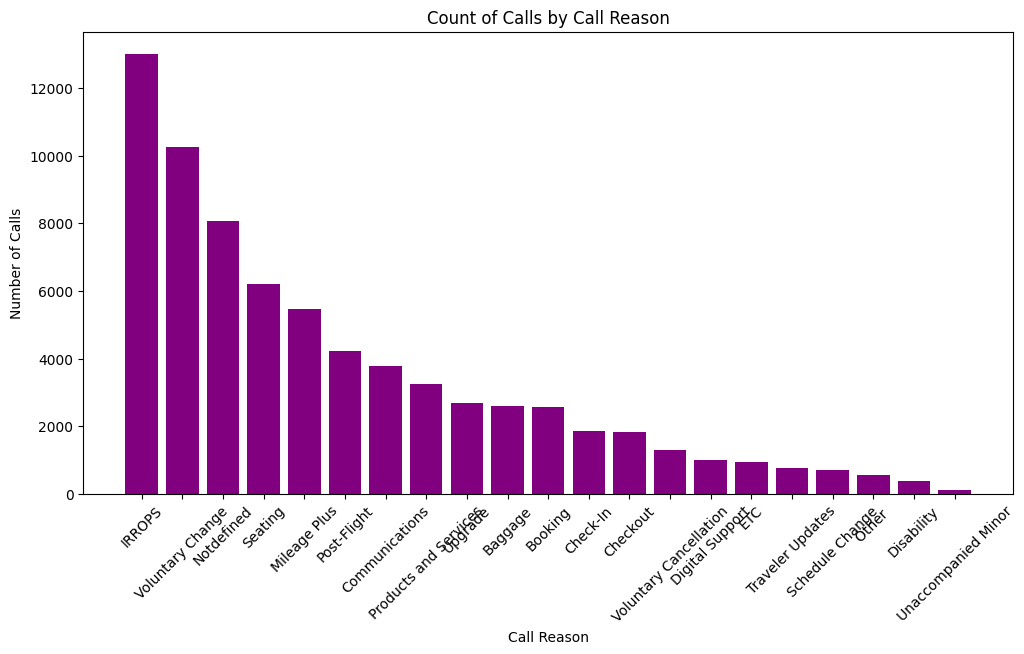

In [ ]:
# Count occurrences of each call reason
call_counts_by_reason = mrg_df['final_call_reason'].value_counts().reset_index()
call_counts_by_reason.columns = ['Call Reason', 'Call Count']

# Plot Count of Calls by Call Reason
plt.figure(figsize=(12, 6))
plt.bar(call_counts_by_reason['Call Reason'], call_counts_by_reason['Call Count'], color='purple')
plt.title('Count of Calls by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()


In [ ]:
mrg_df.columns

**try5**

In [ ]:

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



# Download nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and removing stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply cleaning function to call_transcript
mrg_df['cleaned_transcript'] = mrg_df['call_transcript'].apply(clean_text)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split



# Load tokenizer and model (DistilBERT for speed)
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')
model = BertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(mrg_df['final_call_reason'].unique()))

# Tokenize the transcripts
X = mrg_df['call_transcript'].tolist()
y = mrg_df['final_call_reason'].tolist()

# Convert text and labels into tokenized format
X_tokenized = tokenizer(X, padding=True, truncation=True, return_tensors='pt', max_length=512)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tokenized['input_ids'], y, test_size=0.2, random_state=42)

# Convert labels to torch tensors
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test
)

# Fine-tune the model
trainer.train()

# Evaluate the model
trainer.evaluate()


In [ ]:
from textblob import TextBlob

# Apply TextBlob to each transcript
mrg_df['blob'] = mrg_df['call_transcript'].apply(lambda x: TextBlob(x))

# Extract sentiment and subjectivity features
mrg_df['sentiment'] = mrg_df['blob'].apply(lambda x: x.sentiment.polarity)
mrg_df['subjectivity'] = mrg_df['blob'].apply(lambda x: x.sentiment.subjectivity)

# Use these features for classification
X = mrg_df[['sentiment', 'subjectivity']]
y = mrg_df['final_call_reason']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train simple model (e.g., RandomForest)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
mrg_df.columns

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load data

# Download nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and removing stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply cleaning function to call_transcript
mrg_df['cleaned_transcript'] = mrg_df['call_transcript'].apply(clean_text)


In [ ]:
pip install pandas nltk gensim scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply cleaning function
mrg_df['cleaned_transcript'] = mrg_df['call_transcript'].apply(clean_text)

# Display cleaned transcripts
print(mrg_df[['call_transcript', 'cleaned_transcript']].head())


                                     call_transcript  \
0  \n\nAgent: Thank you for calling United Airlin...   
1  \n\nAgent: Thank you for calling United Airlin...   
2  \n\nAgent: Thank you for calling United Airlin...   
3  \n\nAgent: Thank you for calling United Airlin...   
4  \n\nAgent: Thank you for calling United Airlin...   

                                  cleaned_transcript  
0  [agent, thank, calling, united, airlines, cust...  
1  [agent, thank, calling, united, airlines, name...  
2  [agent, thank, calling, united, airlines, cust...  
3  [agent, thank, calling, united, airlines, cust...  
4  [agent, thank, calling, united, airlines, cust...  


In [ ]:
glove_file = '/path/to/your/glove.6B.100d.txt'

In [ ]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=da6017f27ef94f175e6add3402cf43932ce813f095cea2f7d982b1e02f4b600b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'

    # Download the file
wget.download(glove_url)

    # Unzip the file (if necessary)
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from gensim.models import KeyedVectors

# Path to the GloVe file
glove_file = 'glove.6B.100d.txt'

# Convert GloVe to Word2Vec format (only needed once)
from gensim.scripts.glove2word2vec import glove2word2vec

word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_file, word2vec_output_file)

# Load the converted GloVe model
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

print("GloVe model loaded.")

<ipython-input-87-625b5f484b37>:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


GloVe model loaded.


In [ ]:
def get_average_word_embeddings(tokens, model, embedding_dim=100):
    valid_embeddings = []
    for word in tokens:
        if word in model.key_to_index:
            valid_embeddings.append(model[word])
    if valid_embeddings:
        # Average the embeddings
        avg_embedding = np.mean(valid_embeddings, axis=0)
    else:
        # If no words are in the vocabulary, return a zero vector
        avg_embedding = np.zeros(embedding_dim)
    return avg_embedding

# Apply the embedding function
mrg_df['embedding'] = mrg_df['cleaned_transcript'].apply(lambda x: get_average_word_embeddings(x, model))

# Convert embeddings to a 2D numpy array
X_embeddings = np.vstack(mrg_df['embedding'].values)

print("Embeddings shape:", X_embeddings.shape)


Embeddings shape: (71593, 100)


In [ ]:
df=mrg_df.copy()

In [ ]:
# Ensure the datetime columns are parsed correctly
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

# Compute Call Duration (in seconds)
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# Compute Wait Time (in seconds)
df['wait_time'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds()

# Handle any missing or negative durations (if any)
df['call_duration'] = df['call_duration'].fillna(0).clip(lower=0)
df['wait_time'] = df['wait_time'].fillna(0).clip(lower=0)

# Add time-based features to additional features
additional_features = df[['average_sentiment', 'silence_percent_average', 'elite_level_code',
                          'customer_tone', 'agent_tone', 'call_duration', 'wait_time']].copy()

# Handle missing elite_level_code values
additional_features['elite_level_code'] = additional_features['elite_level_code'].fillna(0)

# Encode categorical variables (customer_tone, agent_tone)
additional_features = pd.get_dummies(additional_features, columns=['customer_tone', 'agent_tone'], drop_first=True)

# Convert the additional features into a numpy array
X_additional = additional_features.values

# Combine with your word embeddings (X_embeddings)
X = np.hstack((X_embeddings, X_additional))

# Check combined feature shape
print("Combined feature shape:", X.shape)


Combined feature shape: (71593, 113)


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['final_call_reason'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.3406
Classification Report:
                        precision    recall  f1-score   support

               Baggage       0.14      0.00      0.00       519
               Booking       0.27      0.22      0.24       515
              Check-In       0.00      0.00      0.00       374
              Checkout       0.79      0.45      0.57       367
        Communications       0.30      0.13      0.19       755
       Digital Support       0.00      0.00      0.00       198
            Disability       0.00      0.00      0.00        79
                   ETC       0.00      0.00      0.00       186
                IRROPS       0.33      0.87      0.48      2602
          Mileage Plus       0.40      0.32      0.35      1095
            Notdefined       0.16      0.02      0.03      1613
                Other        0.00      0.00      0.00       113
           Post-Flight       0.35      0.28      0.31       844
 Products and Services       0.11      0.00      0.01       652

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
dataset = mrg_df.copy()  # assume the dataset is already loaded

# Preprocess the call_transcript column
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numerical values
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

dataset['call_transcript'] = dataset['call_transcript'].apply(preprocess_text)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the data and transform the call_transcript column
tfidf_matrix = vectorizer.fit_transform(dataset['call_transcript'])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=5, max_iter=5)
lda_topics = lda.fit_transform(tfidf_matrix)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Group by final_call_reason and extract top words for each topic
for reason, group in dataset.groupby('final_call_reason'):
    lda_topics_group = lda.transform(vectorizer.transform(group['call_transcript']))
    topic_words = []
    for topic in lda_topics_group:
        topic_words.extend([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
    topic_words = list(set(topic_words))  # remove duplicates
    print(f"Final Call Reason: {reason}")
    print("Top words:")
    for word in topic_words:
        print(f"  {word}")
    print()

Final Call Reason: Baggage
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Booking
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Check-In
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Checkout
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Communications
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Digital Support
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Disability
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: ETC
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: IRROPS
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Mileage Plus
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Notdefined
Top words:
  _call
  _you
  ___
  aa
  _______________

Final Call Reason: Other 
Top words:
  _call
  _you
  ___
  aa
 

<ipython-input-74-4e9e127f12ff>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Metric', y='Average', hue='agent_tone', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a 

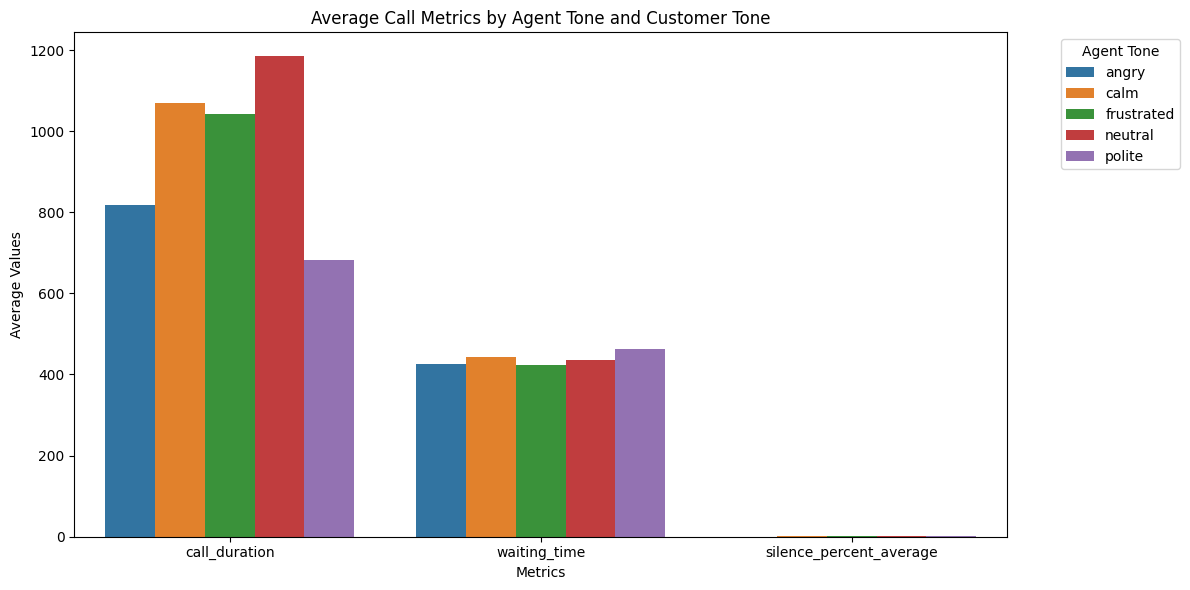

In [ ]:

grouped_data = mrg_df.groupby(['agent_tone', 'customer_tone'])[['call_duration', 'waiting_time', 'silence_percent_average']].mean().reset_index()

# Melt the DataFrame for easier plotting
melted_data = grouped_data.melt(id_vars=['agent_tone', 'customer_tone'],
                                  value_vars=['call_duration', 'waiting_time', 'silence_percent_average'],
                                  var_name='Metric', value_name='Average')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=melted_data, x='Metric', y='Average', hue='agent_tone', ci=None)

# Adding labels and title
plt.title('Average Call Metrics by Agent Tone and Customer Tone')
plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.legend(title='Agent Tone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()
